# 4.9.2 Intro to Data Visualization
## -change name of 'customers_orders_products_merged.pkl' to 'instacart' for this practice (note: name is not exported and still remains as named in my folder)
## -histogram of peak hours
## -bar chart of loyal customers
## -use seed and dev to create a sample (prior to creating line chart)
## -line chart (age & family situation - no correlation)
## -scatterplot (age & spending power)
### -export visualizations

# Part 2

# #1) Import libraries and new dataset, 'customers_orders_products_merged'

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
path =r'/Users/nancykray/Desktop/Instacart Basket Analysis'

In [4]:
#import new dataset and name 'instacart'
instacart=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customers_orders_products_merged.pkl'))

In [5]:
#check head
instacart.head()

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,first_name,surname,gender,state,age,date_joined,dependants,marital_status,income,_merge
0,2539329,1,1,2,8,NaN,First Order,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,Repeat Customer,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,Repeat Customer,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,Repeat Customer,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,Repeat Customer,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


# #2) If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart. 
-this was done in a separate script during the lesson 


# #3) You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.  *note:  I changed this column name to 'order time'
# -In a markdown cell beneath your histogram, describe what the histogram demonstrates. 


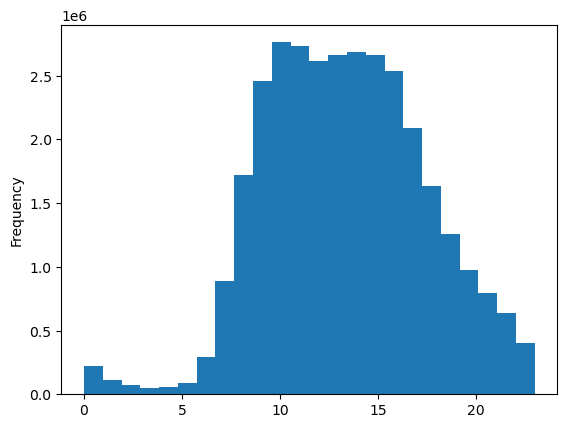

In [8]:
# create histogram of descriptive findings about sales for 'order_hour_of_day' column
hist = instacart['order_time'].plot.hist(bins = 24)

### This histogram shows a sharp and consistent peak in the center, where these results indicate that most orders for Instacart are placed between the 10:00 and 15:00, or mid-day (10am-3pm).  This implies that people are likelly shopping during their lunch times or when they are possibly just leaving work.  This makes sense in order for them to have the convenience of having the food ready when they get home for the evening.

# #4) The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.


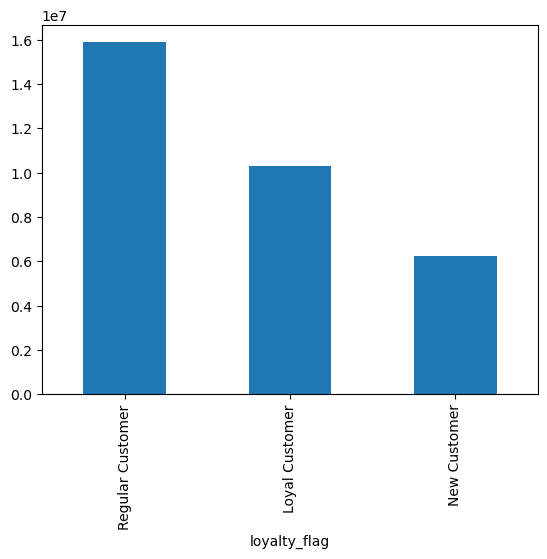

In [11]:
loyal_bar=instacart['loyalty_flag'].value_counts().plot.bar()

# #5) Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [12]:
#create a random sample to get an accurate representation of the data set (to avoid crashing)
#set the seed to 4 as that is what the lesson example did, and it doesn't matter, just to keep Python consistent
#also I am using the 30/70 sample for this:
np.random.seed(4)
dev=np.random.rand(len(instacart))<=0.7

In [13]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [14]:
#testing the random numbers between 0 and 1
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [15]:
# Store 70% of the sample in the dataframe big
big=instacart[dev]

In [16]:
# Store 30% of the sample in the dataframe small
small=instacart[~dev]

In [17]:
#use len() function to see the number of rows in hopes that it is the same as the entire dataframe
len(instacart)

32404859

In [19]:
len(big) + len(small)

32404859

In [18]:
#compare 
instacart.shape

(32404859, 34)

### yes it matches

### one more step before the line chart: reduce the samples to only those columns necessary for the chart, 'prices' and 'order_time'

In [20]:
instacart_2=small[['prices', 'order_time']]

In [21]:
#check subset sample
instacart_2.head()

,prices,order_time
0,9.0,8
2,9.0,12
3,9.0,7
6,9.0,9
10,12.5,8


### good, the sample is now separated into only the columns I need

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


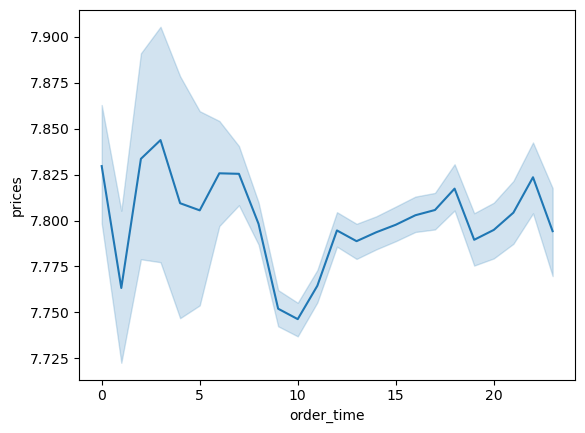

In [22]:
#now create the line chart 
line = sns.lineplot(data = instacart_2, x = 'order_time', y = 'prices')

# #6) Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
In a markdown cell beneath your line chart, describe what the line chart shows.

In [23]:
#reduce the samples to only those columns necessary for the chart, 'age' and 'dependants'
instacart_3=small[['age', 'dependants']]

In [24]:
#check subset sample
instacart_3.head()

,age,dependants
0,31,3
2,31,3
3,31,3
6,31,3
10,31,3


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


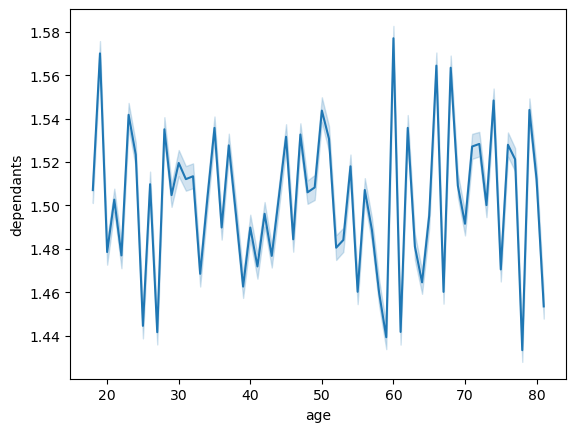

In [25]:
#now create the line chart 
line_2 = sns.lineplot(data = instacart_3, x = 'age', y = 'dependants')

### There does not seem to by any definitive pattern here to suggest that there is any correlation between age and family situation (or number of dependants).

# #7) You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
In a markdown cell beneath your scatterplot, describe what the scatterplot shows.


In [35]:
#reduce sample to only what is needed to create the chart
instacart_4 = small [['age', 'income']]

In [36]:
#check head

In [38]:
instacart_4.head()

,age,income
0,31,40423
2,31,40423
3,31,40423
6,31,40423
10,31,40423


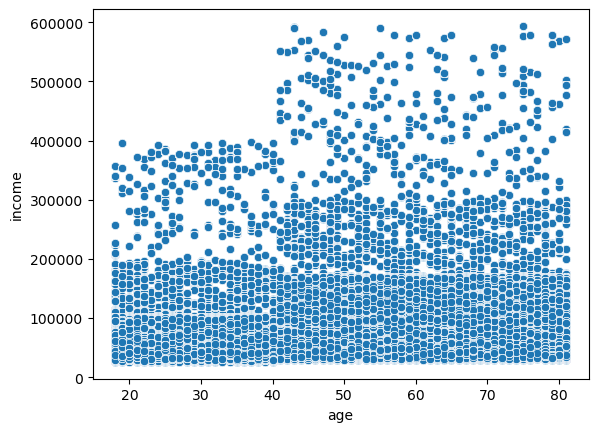

In [39]:
scatterplot = sns.scatterplot(x = 'age', y = 'income',data = instacart_4)

There is a correlation here between age and spending power represented in this scatterplot as there is a definitive jump in income at age 40, there is a huge jump from a max of 400,000 to 600,000 dollars.  This jump is also represented in what appears to be the average from about 200,000 to 300,000 dollars at age 40 (this information judged by looking at the high density of dots on the scatterplot).  This would need to be backed up by statistical analysis.  



# #8) Export your visualizations as “.png” files in your relevant project folder

In [41]:
#export histogram for 'order_time'
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_order_time.png'))

In [43]:
#export bar graph for 'loyal_customers'
loyal_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_flag.png'))

In [44]:
#export line chart for 'prices' and 'order_time'
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_and_order_time.png'))

In [45]:
#export line_2 chart for 'age' and 'dependants' 
line_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_2_age_vs_dependants.png'))

In [47]:
#export scatterplot for 'age' and 'income'
scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_vs_income.png'))